# Glider Flight Simulation
Lilo Heinrich and Jackie Zeng

## Question

<!-- Question: 
What type of question is this (explanatory, predictive, or design)?
Why is this an important or interesting question?
What will we learn by asking this question?
 -->

**How does the initial velocity of a glider plane affect the distance traveled before reaching the ground?**

This question is both explanatory and predictive. Our model strives to explain the behavior of current gliders as well as predict a glider's flight length given its initial velocity. Both of us found this question interesting as we were interested in glider planes, Lilo, in particular, has flown over a dozen times in gliders. Glider plane pilots and enthusiasts will also find this topic important because understanding how velocity affects the aircraft will allow them to have a better flight experience. By asking this question, we will learn whether the starting velocity of a glider is important, and if so, what speed should one start at to fly the maximum distance?

## Methodology

<!-- Methodology/Model:
How are you going to answer your proposed question?
What assumptions are you making? Are these good or bad assumptions?
How did you develop and refine your model?
How did you set the parameters of your model?
How did you validate your model?
 -->

To answer this question, we must first understand what a glider is and its related physics. A glider is a special kind of aircraft that does not have an engine. However, large piloted gliders, the type that we are modeling, are complete with everything else - standard aircraft parts, construction, and flight control systems, etc. During flight, since there is no engine for thrust on the aircraft, there are only three main forces on a glider - lift, drag, and gravity. These forces are vector quantities with magnitude and direction components. [Lift](https://www.grc.nasa.gov/WWW/K-12/airplane/lift1.html) and [drag](https://www.grc.nasa.gov/WWW/K-12/airplane/drag1.html) are aerodynamic forces. The lift is directed perpendicular to the direction of the glider and the drag is directed opposite of the direction of flight. The gravitational force acts through the center of gravity of the aircraft and is always directed towards the earth.

We plan to answer our proposed question by simulating a glider's flight starting from an altitude of 1000 meters. By simulating a glider's complete trajectory, we can find out a glider's total horizontal distance traveled. We based our project on the equations detailed in this [University of Connecticut Glider Physics Paper](https://www.phys.uconn.edu/~rozman/Courses/P2200_14F/downloads/glider/glider-2014-11-05.pdf).


Below is the force diagram of a cambered airfoil.

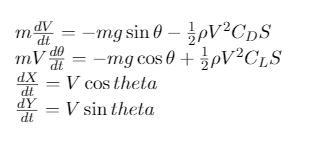
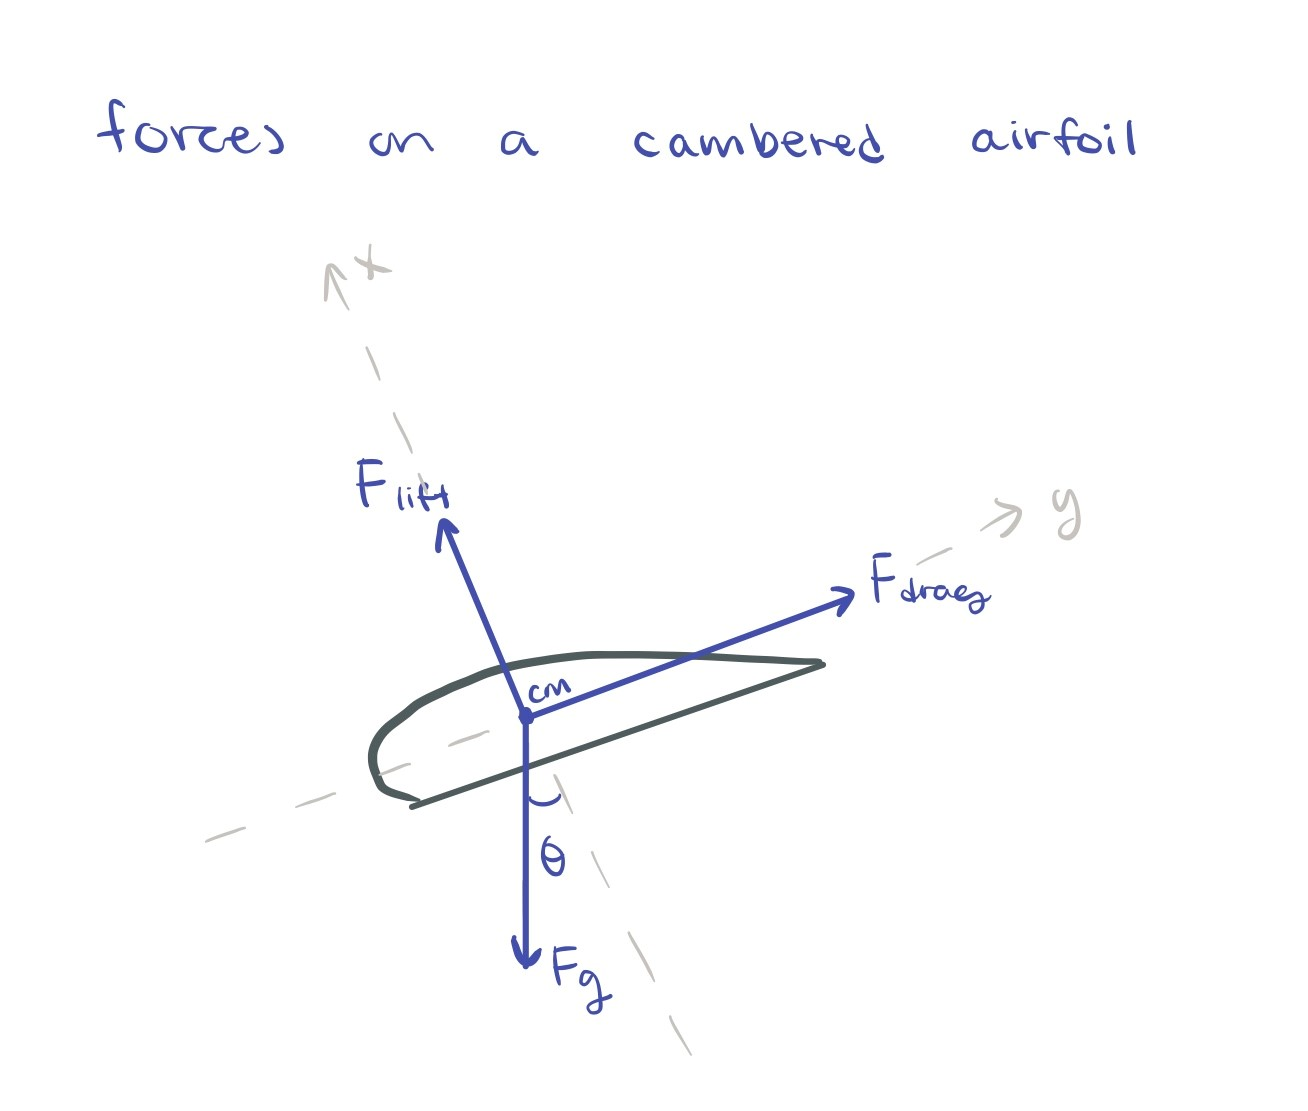

<p style="text-align: center;">
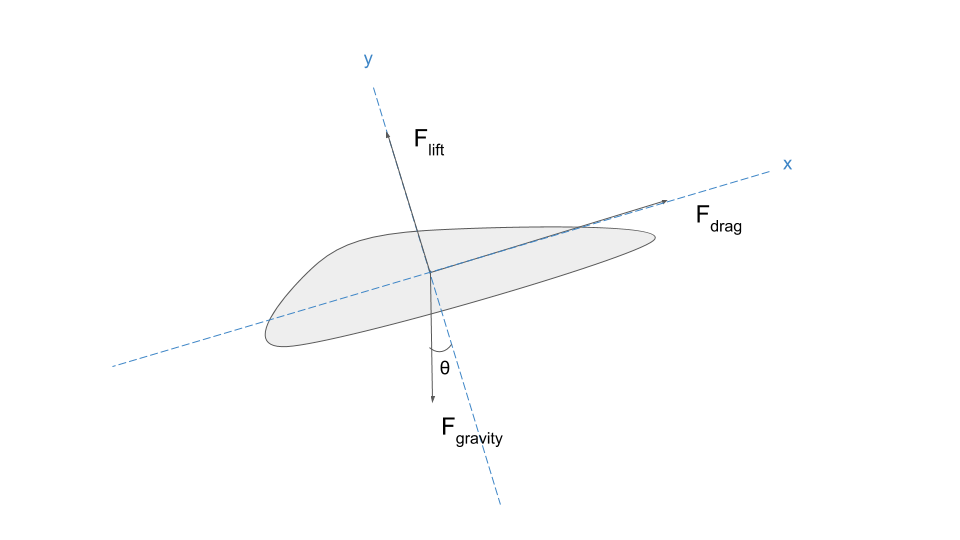    

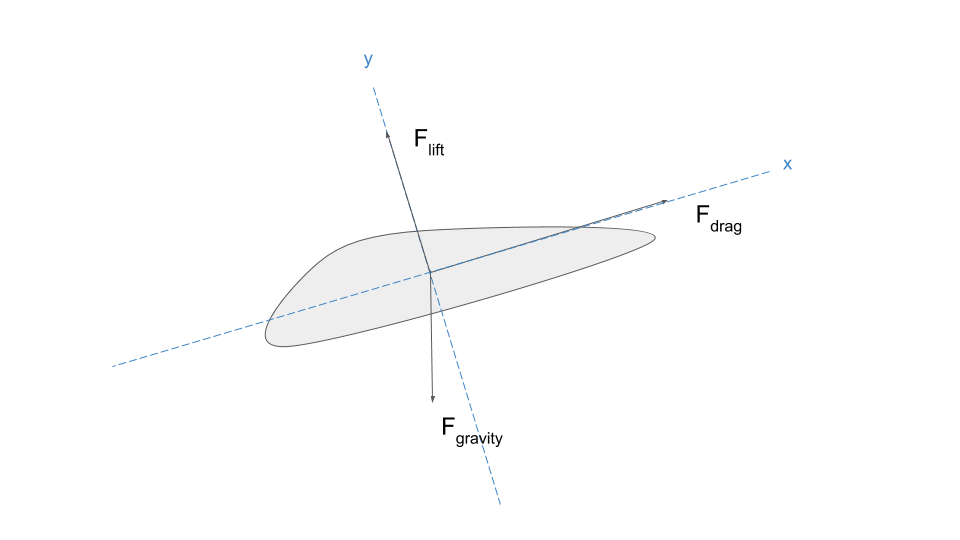

    
### Equations
<p style="text-align: center;">
<img src="Equations.JPG" style="max-width:80%">

<!--- 
$$
m\frac{dV}{dt} = -mg\sin{\theta} - \frac{1}{2}\rho V^2 C_D S \newline   
mV\frac{d\theta}{dt} = -mg\cos{\theta} + \frac{1}{2}\rho V^2 C_L S \newline   
\frac{dX}{dt} = V\cos{theta} \newline   
\frac{dY}{dt} = V\sin{theta} \newline   
$$
--->    
    
### Parameters 
        
h_init = initial height of glider  
v_init = initial velocity of glider  
theta_init = initial angle of attack of glider  
g = acceleration due to gravity  
rho = density of air  

The following attributes of the plane are embedded in the Glider class:  

name : name of the glider  
area : frontal surface area of the glider wings  
mass_min : empty weight of the glider  
mass_max : maximum takeoff weight  
Cl = coefficient of lift  
Cd = coefficient of drag  
    
We assumed this model to be a typical flight of a glider and set initial height, initial velocity, and initial angle of attack to 1000 m, 30 m/s, and 0 degrees, respectively. To initialize mass and frontal area, we used values for a [Schleicher ASK 13](https://en.wikipedia.org/wiki/Schleicher_ASK_13) glider, an aircraft often used for glider training. 
    
To determine the lift and drag coefficients, we found the Cd and Cl curves for a typical cambered airfoil from a [graph](https://en.wikipedia.org/wiki/Airfoil) that plotted lift and drag coefficients of this airfoil over angle of attack. We simply took the values at an angle of attack of 0 degrees.  
    
<!--     (http://airfoiltools.com/airfoil/details?airfoil=goe535-il) -->
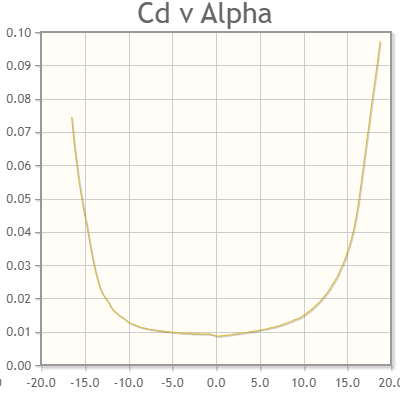
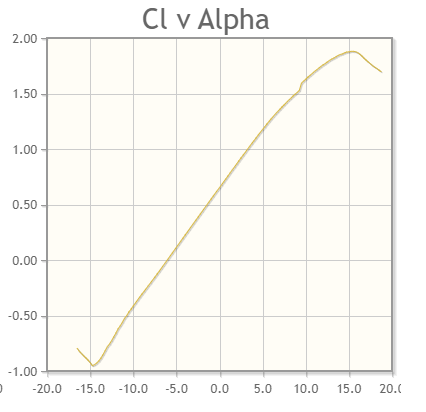

<p style="text-align: center;">
        

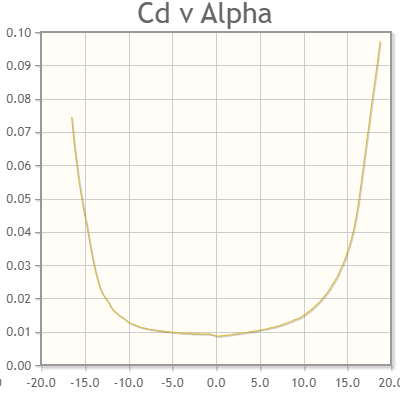
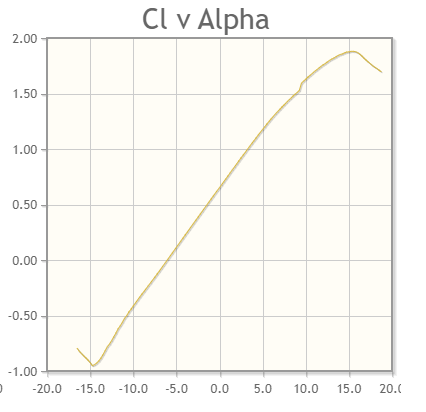

### State 
R: position vector  
V: velocity vector  
T: angle (theta) vector  
    
### Assumptions

Since glider flight is a complicated physics topic, we had to make several assumptions in order to simplify into a model that we would be able to execute.

First, we assumed that the air density remains constant with altitude, which is a fair assumption as long as the glider's maximum altitude isn't very high. Given that we are starting our glider at only 1km high, which is relatively high for a glider but not high enough to see a big change in air density, this assumption should have a minimal impact on our model.

Next, we assumed that the air is not moving. Since we are interested in how the initial velocity affects the distance travelled by the glider, we didn't want to complicate the model by adding in moving air, such as thermals and areas of sink that would move the sailplane by exerting additional forces on it. This results in relatively short flight times in our simulation, since usually glider pilots will spiral on the thermals to gain altitude as necessary to stay in the air while in our model the air is unmoving.

We also haven't written any code preventing the glider from flying too slow/below stall speed. But to make sure that this isn't a problem we have made sure that our velocity values never go below about 20 m/s, a fairly typical minimum flight speed for gliders.

Lastly, our biggest assumption is that the coefficients of lift and drag stay constant with the angle of attack. In the paper we read, it assumed constant coefficients of lift and drag, causing the lift and drag force to be only reliant on the velocity and not the angle of attack. We did the same in order to implement the equations functionally. As long as the angle doesn't fluctuate too much, or the oscillations settle out into an equilibrium at a certain glide angle, we figured that this would not be too inaccurate. However, for large angle fluctuations, this model is not very accurate.

### Validation
We validated our model with glider information from NASA and the data on the Wikipedia page of Schleicher ASK 13, the glider we chose to model. 

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# for trigonometric functions
import math

# for graphing results
import matplotlib.pyplot as plt

In [2]:
# Units:
s = UNITS.second
deg = UNITS.degree
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
km = UNITS.kilometer
h = UNITS.hour

<Unit('hour')>

Creates a glider class to store important attributes and values.

In [3]:
class Glider:
    def __init__(self, name, area, mass_min, mass_max, Cl, Cd):
        self.name = name
        self.area = area
        # According to Wikipedia, gliders function better with heavier weights.
        # We chose to use the median weight to simulate average conditions.
        self.mass = (mass_min + mass_max) / 2
        self.Cl = Cl
        self.Cd = Cd

Setting initial conditions for the glider plane Schleicher_ASK_13

In [23]:
glider = Glider("Schleicher_ASK_13", 17.5 *m**2, 295 *kg, 480 *kg, 0.5, 0.1)
params = Params(h_init = 1000.0 *m, v_init = 30.0 *m/s, theta_init=0.0, g = 9.8 *m/s**2, rho = 1.2 *kg/m**3, glider = glider)

,values
h_init,1000.0 meter
v_init,30.0 meter / second
theta_init,0
g,9.8 meter / second ** 2
rho,1.2 kilogram / meter ** 3
glider,<__main__.Glider object at 0x7f20b96345c0>


In [24]:
def make_system(params):
    """
    Makes a System object for the given conditions.

    params: Params object with glider info and constants

    returns: System object
    """
    h_init, v_init, theta_init = params.h_init, params.v_init, params.theta_init
    init = State(R=Vector(0.0, h_init), V=v_init, T=theta_init)

    t_end = 3600 * s # 1 hour
    dt = 1 * s # 1 second

    return System(params, init=init, t_end=t_end, dt=dt)

In [25]:
system = make_system(params)

,values
h_init,1000.0 meter
v_init,30.0 meter / second
theta_init,0
g,9.8 meter / second ** 2
rho,1.2 kilogram / meter ** 3
glider,<__main__.Glider object at 0x7f20b96345c0>
init,"R [0.0 meter, 1000.0 meter] V 30.0..."
t_end,3600 second
dt,1 second


In [26]:
def slope_func(state, t, system):
    """
    Compute derivatives of the state.

    state: position, velocity, angle
    t: time
    system: System object

    returns: derivatives of position, velocity, and angle
    """
    R, V, T = state
    g, rho, glider = system.g, system.rho, system.glider
    mass, Cd, Cl, S = glider.mass, glider.Cd, glider.Cl, glider.area

    drdt = Vector(V*math.cos(T), V*math.sin(T))
    dvdt = -g*math.sin(T) - rho*V**2*Cd*S/(2*mass)
    dtdt = -g*math.cos(T)/V + rho*V*Cl*S/(2*mass)

    return drdt, dvdt, dtdt

In [27]:
def event_func(state, t, system):
    """
    Returns whether the glider has reached the ground.

    state: position, velocity, angle
    t: time
    system: system object

    returns: vertical component of position
    """
    R, V, T = state
    return R.y

In [28]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
success,True
message,A termination event occurred.


In [41]:
results.head()

,R,V,T
0.0,"[0.0 meter, 1000.0 meter]",54.0 meter / second,0
1.0,"[47.61862124138091 meter, 1013.1061171851727 m...",44.56272830423041 meter / second,0.49192342740825096 dimensionless
2.0,"[77.93402786593848 meter, 1038.052150980134 me...",34.051539013151 meter / second,0.8394986589790687 dimensionless
3.0,"[94.27294055204118 meter, 1061.6922737569848 m...",23.69178800504948 meter / second,1.0398701261788148 dimensionless
4.0,"[102.90747720841202 meter, 1078.2734498027241 ...",14.01130511326041 meter / second,1.050824606336314 dimensionless


Sweeps initial velocities from 20 m/s to 55 m/s to see how velocity affects distance traveled by the glider. 

In [47]:
def sweepVelocity(minVelocity, maxVelocity):
    sweep = SweepSeries()
    glider = Glider("Schleicher_ASK_13", 17.5 *m**2, 295 *kg, 480 *kg, 0.5, 0.1)
    for i in range(minVelocity, maxVelocity):
        params = Params(h_init = 1000.0 *m, v_init = i *m/s, theta_init=0.0, g = 9.8 *m/s**2, rho = 1.2 *kg/m**3, glider = glider)
        system = make_system(params)
        results, details = run_ode_solver(system, slope_func, events=event_func)
        xs = results.R.extract('x')
        index = len(xs)-2
        sweep[xs[index]] = i
    return sweep

## Results

Our model generated position and velocity vectors of the glider plane over time as a Time Series. The first three graphs are modeled with an inital velocity of 30 m/s to represent a typical flight.

By extracting the x and y position, we were able to plot the trajectory of the glider. The aircraft oscillates towards the beginning but soon levels out into a smooth flight.

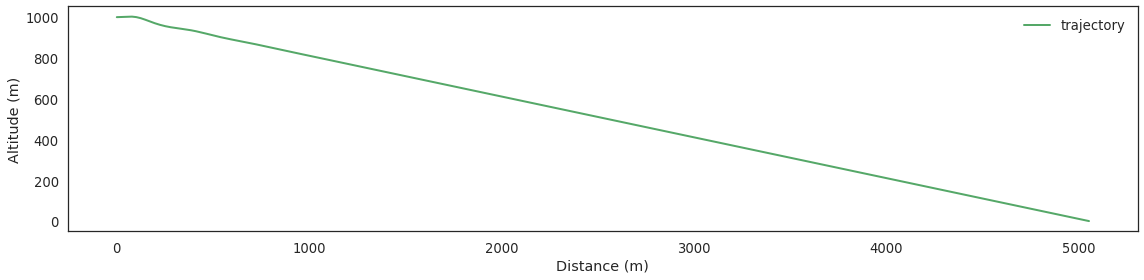

In [30]:
def plot_trajectory(results):
    """
    Plots a particular timeseries on a 2D grid.

    results: timeseries resulting from the run_ode_solver function

    returns: plot of the glider flight
    """
    xs = results.R.extract('x')
    ys = results.R.extract('y')
    plt.figure(figsize=(16, 4))
    plot(xs, ys, color='C2', label='trajectory')
    decorate(xlabel='Distance (m)', ylabel='Altitude (m)')

plot_trajectory(results)

In the following graph, we plotted the angle of the glider over time. The graph indicated that the plane experienced a lot of turbulence within the first 50 seconds of flight. 

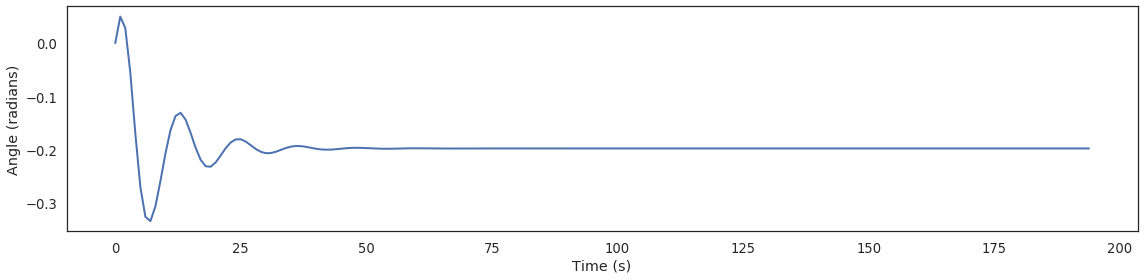

In [31]:
plt.figure(figsize=(16, 4))
plot(results.T)
decorate(xlabel='Time (s)', ylabel='Angle (radians)')

In the following graph, We graphed velocity over time. It followed a similar pattern as the angle over time plot. 

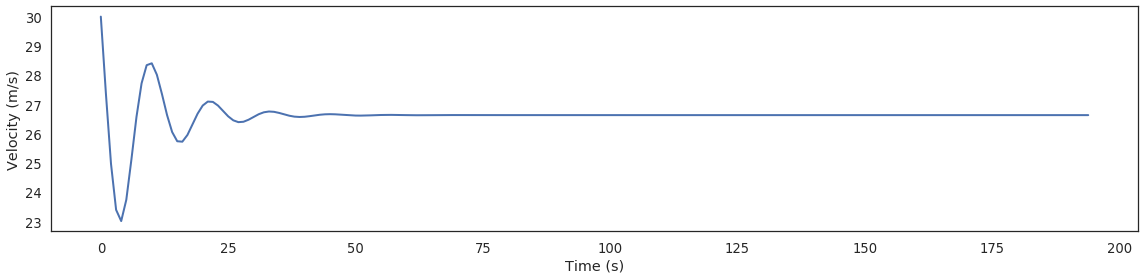

In [32]:
plt.figure(figsize=(16, 4))
plot(results.V)
decorate(xlabel='Time (s)',
         ylabel='Velocity (m/s)')

The following figure shows the distance the glider travels at different initial velocities.

In [54]:
sweep = sweepVelocity(16, 55)
sweep.head()

4834.692509    16
4862.998030    17
4865.037147    18
4893.035205    19
4894.756534    20
dtype: int64

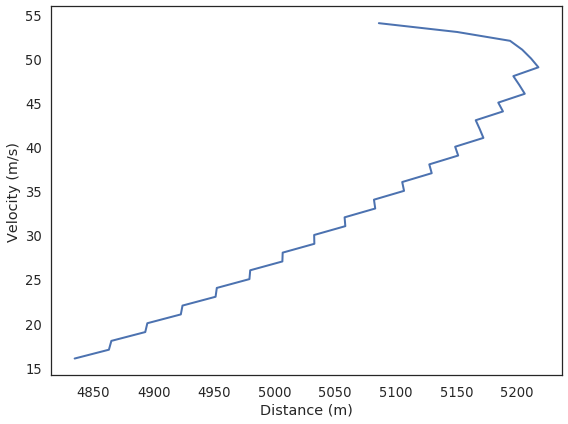

In [55]:
plt.figure(figsize=(8, 6))
plot(sweep)
decorate(xlabel='Distance (m)', ylabel='Velocity (m/s)')

## Interpretation

When we simulated a glider flying with an initial angle of 0 degrees and inital speed of 30 m/s, the trajectory showed an almost linear descent. Looking at the velocity and angle graphs however, they show more oscillation. Since we are letting the glider fly on its' own without taking control and setting a fixed pitch angle, this oscillation makes a lot of sense. After a few cycles, the oscillations settle and it reaches its' equilibrium at approximately -0.24 radians or 13 degrees pitch. As the [NASA webpage on glider flight](https://www.grc.nasa.gov/WWW/k-12/airplane/glidvec.html) showed, gliders often/always fly with the nose down, usually at a shallow angle to avoid stalling. This shows that 13 degrees is a fairly correct value.

Next, we swept over different starting velocities, starting with a minimum of 16 m/s and a maximum of 55 m/s. The Scheichler ASK 13 that we used in our model has a stall speed of about 16 m/s and 'never-exceed' speed of about 55 m/s. We used this range of velocities because we wanted to see if there were interesting behaviors at the extremes. The graph above shows that around 53 m/s the glider starts becoming less effective, not travelling as far as with smaller starting velocities. We think this is because at that speed the glider doesn't behave consistently in our simulation. This is presumably because a real glider would become difficult to handle and would experience failure at these speeds. This result is validated by the fact that the maximum recommended flight speed for this glider is 124 mph, or 55.1 m/s, according to its' [Wikipedia entry](https://en.wikipedia.org/wiki/Schleicher_ASK_13).